# NumPy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

## A Quick Comparison

The following example show the same mathematical operation done without and with NumPy.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

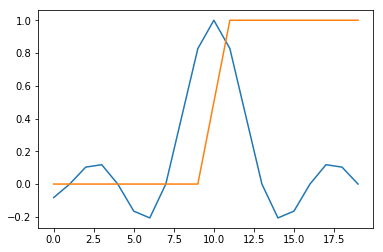

In [2]:
# Without NumPy
from math import sin, pi
def sinc(x):
    if x == 0:
        return 1.0
    else:
        pix = pi*x
    return sin(pix)/pix

def step(x):
    if x > 0:
        return 1.0
    elif x < 0:
        return 0.0
    else:
        return 0.5

xval = [x/3.0 for x in range(-10,10)]
yval1 = [sinc(x) for x in xval]
yval2 = [step(x) for x in xval]

plt.plot(yval1)
plt.plot(yval2)

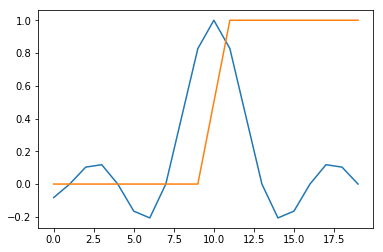

In [3]:
# With NumPy
from numpy import sin, pi
from numpy import vectorize

vsinc = vectorize(sinc)
def sinc(x):
    pix = pi*x
    val = sin(pix)/pix
    val[x==0] = 1.0
    return val

vstep = vectorize(step)
def step(x):
    y = x*0.0
    y[x>0] = 1
    y[x==0] = 0.5
    return y

from numpy import *
x = r_[-10:10]/3.0
y1 = sinc(x)
y2 = step(x)

plt.plot(y1)
plt.plot(y2)

As you can see, NumPy allows you to write cleaner and faster code through vectorization.



## NumPy Array

The built-in **list** in python can be used as arrays, but the operations are not efficient. NumPy arrays are implemented with C and Fortran in the low-level and provide a friendly high-level interface. Therefore, NumPy arrays are both efficient and easy to use, and form the basis for many other packages such as Pandas, SciPy, Scikit-learn... etc.

In [4]:
# Import the NumPy library
import numpy as np
# Create 2 arrays
array1d = np.array(list(range(27)))
array2d = array1d[:9].reshape([3,3])
array3d = array1d.reshape([3,3,3])
# See what happens
print("Shape of 1D array: " + str(array1d.shape))
print(array1d)
print("Shape of 2D array: " + str(array2d.shape))
print(array2d)
print("Shape of 3D array: " + str(array3d.shape))
print(array3d)

Shape of 1D array: (27,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Shape of 2D array: (3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Shape of 3D array: (3, 3, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


## NumPy Array Indexing

Elements in NumPy arrays can be indexed and sliced with its position:
- Single element can be indexed with `X[i]`, `X[i,j]`, `X[i,j,k]`... etc.
- A block of elements can be sliced in the form of `X[i1:i2, j1:j2, k1:k2]`

In [5]:
import numpy as np
# Let's create a 5x5x5 matrix
arr = np.arange(125).reshape([5,5,5])
# And now make some slices of it
print("Slice the 2nd 5x5 array:")
print(arr[1,:,:])
print()
print("Slice the 2nd and the 4th 5x5 arrays:")
print(arr[1::2,:,:])

Slice the 2nd 5x5 array:
[[25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]

Slice the 2nd and the 4th 5x5 arrays:
[[[25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]
  [45 46 47 48 49]]

 [[75 76 77 78 79]
  [80 81 82 83 84]
  [85 86 87 88 89]
  [90 91 92 93 94]
  [95 96 97 98 99]]]


## NumPy Array Operations

NumPy provides many functions to operate on arrays efficiently.

- Splitting:
  - array_split: Split an array into multiple sub-arrays of equal or near-equal size.
  - split: Split array into a list of multiple sub-arrays of equal size.
  - hsplit: Split array into multiple sub-arrays horizontally (column wise)
  - vsplit: Split array into multiple sub-arrays vertically (row wise)
  - dsplit: Split array into multiple sub-arrays along the 3rd axis (depth).


In [6]:
import numpy as np
# Let's create a 2x3x4 matrix
arr = np.arange(24).reshape([2,3,4])
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [7]:
# Then split it in different ways
np.vsplit(arr,2)[0]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [8]:
np.hsplit(arr,3)[0]

array([[[ 0,  1,  2,  3]],

       [[12, 13, 14, 15]]])

In [9]:
np.dsplit(arr,4)[0]

array([[[ 0],
        [ 4],
        [ 8]],

       [[12],
        [16],
        [20]]])

- Merging:
  - concatenate: Concatenate function that preserves input masks.
  - stack: Stack a sequence of arrays along a new axis.
  - hstack: Stack arrays in sequence horizontally (column wise)
  - vstack: Stack arrays in sequence vertically (row wise)
  - dstack: Stack arrays in sequence depth wise (along third dimension)

In [10]:
# We can also merge arrays
a1 = np.array([2, 3, 5, 7])
np.concatenate([a1, a1])

array([2, 3, 5, 7, 2, 3, 5, 7])

In [11]:
np.vstack([a1,a1])

array([[2, 3, 5, 7],
       [2, 3, 5, 7]])

In [12]:
np.hstack([a1,a1])

array([2, 3, 5, 7, 2, 3, 5, 7])

In [13]:
np.dstack([a1,a1])

array([[[2, 2],
        [3, 3],
        [5, 5],
        [7, 7]]])

## Broadcasting

Broadcasting describes how arithmetic works between **arrays of different shapes**. It is a very powerful feature, but one that can be easily misunderstood, even by experienced users.

In [14]:
import numpy as np
# Let's start with arrays with the same size
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [15]:
# And then with different sizes
a + 5

array([5, 6, 7])

In [16]:
# And another example
M = np.ones((3, 3))
print('A 3x3 matrix of 1s')
print(M)
print()
print('And plus [0, 1, 2]')
print(M + a)

A 3x3 matrix of 1s
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

And plus [0, 1, 2]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

For data analysis, the broadcasting feature gives us a quick way to calculate means and deviations. For example:

In [17]:
import numpy as np
a = np.ones([3,3])
b = a*2
c = a*3
d = np.stack([a,b,c])
d

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]])

In [18]:
dmean = d.mean(0)
dmean

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [19]:
ddev = d - dmean
ddev

array([[[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]])

## NumPy Random Number

Random number generation is an important part of numerical simulation. With NumPy, the process is simply one function call.

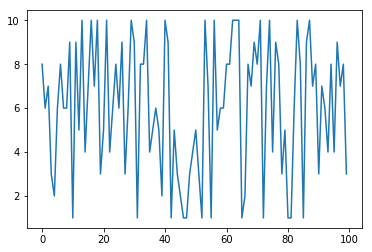

In [20]:
# Generate random integer with numpy.random.randint(min, max, size)
a = np.random.randint(1,11,100)
plt.plot(a)

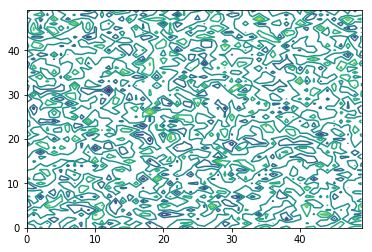

In [21]:
# Generate random integer with numpy.random.randn(shape)
b = np.random.randn(50,50)
plt.contour(b)

Random number can be fixed by specified a random seed, using `numpy.random.seed(seed)`.

In [22]:
import numpy as np
print('Fixed random seed as 1')
np.random.seed(1)
a = np.random.randn(3,3)
print(a)
print('Next')
b = np.random.randn(3,3)
print(b)
print('Fixed random seed as 1 again')
np.random.seed(1)
c = np.random.randn(3,3)
print(c)

Fixed random seed as 1
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]]
Next
[[-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]
 [-1.09989127 -0.17242821 -0.87785842]]
Fixed random seed as 1 again
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]]
